In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

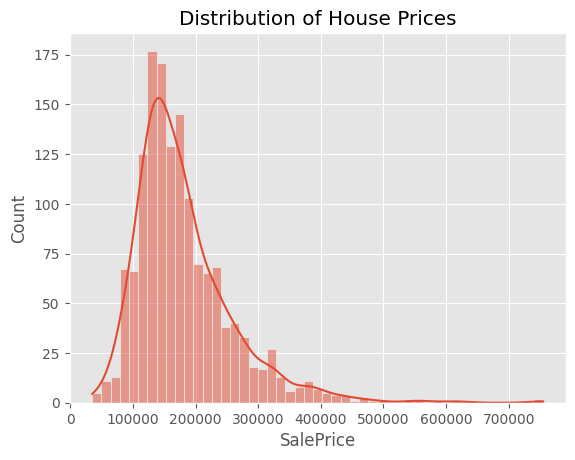

In [6]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

In [7]:
df['SalePrice'].skew()

np.float64(1.8828757597682129)

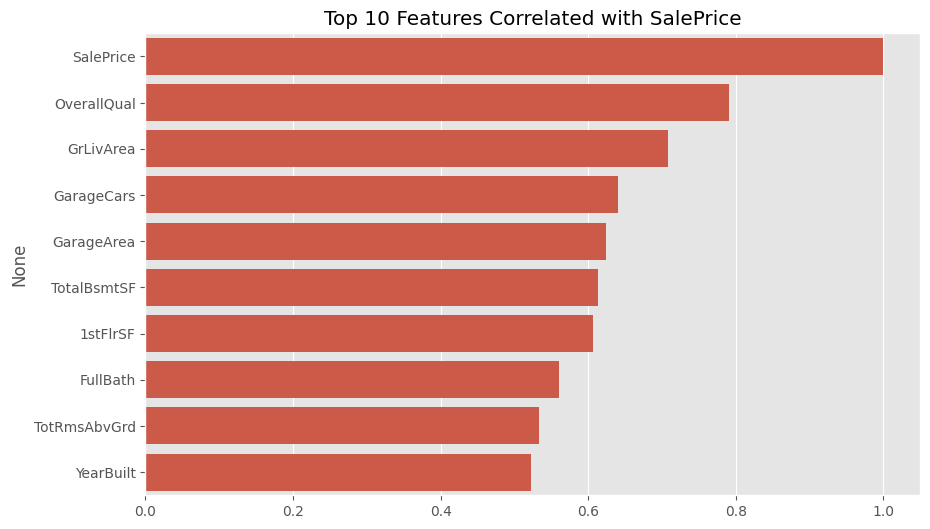

In [8]:
corr_matrix = df.corr(numeric_only=True)
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 10 Features Correlated with SalePrice')
plt.show()


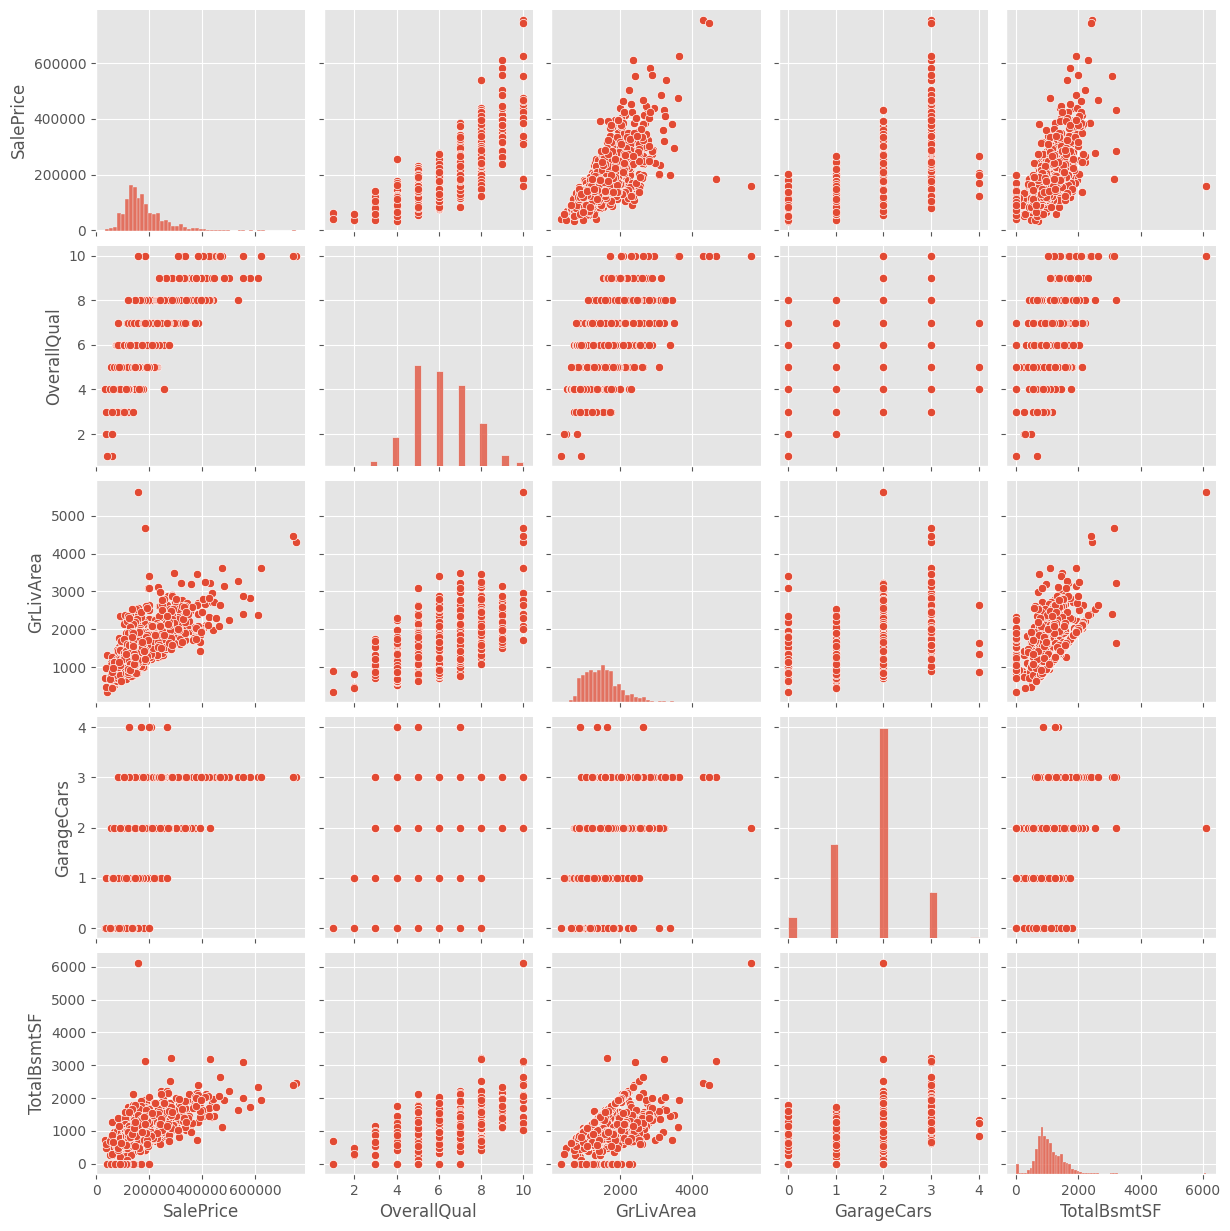

In [9]:
top_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(df[top_features])
plt.show()

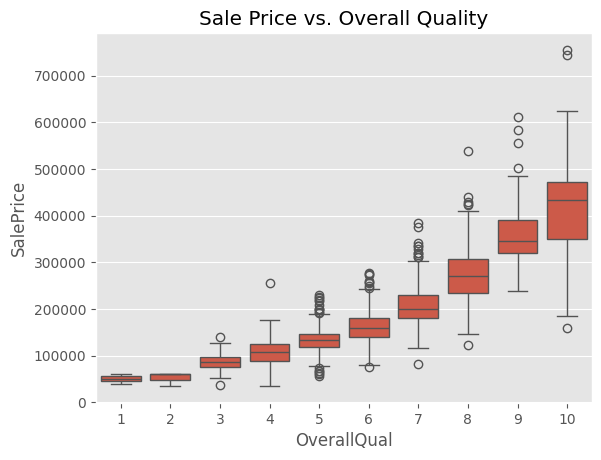

In [10]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Sale Price vs. Overall Quality')
plt.show()

In [11]:
df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'Id'])

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [13]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [14]:
df.isnull().sum().sum()  # should return 0

np.int64(0)

In [15]:
df = pd.get_dummies(df, drop_first=True)
df.shape  # should have more columns now

(1460, 232)

In [28]:
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
X = df[selected_features]
y = df['SalePrice']

In [29]:
# Save the feature names
import joblib
joblib.dump(X.columns, 'feature_names.pkl')

['feature_names.pkl']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))

R² Score: 0.7909
RMSE: 40051.2


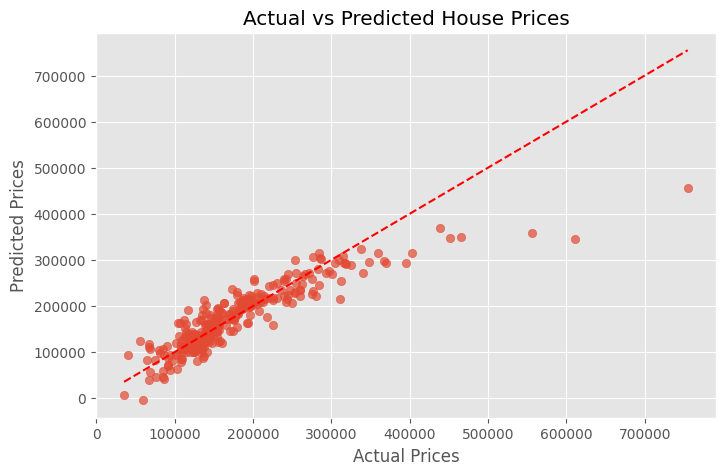

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

In [35]:
import joblib

joblib.dump(model, 'house_price_model.pkl')

['house_price_model.pkl']

In [36]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)

print("Ridge R²:", r2_score(y_test, y_ridge_pred))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_ridge_pred)))

Ridge R²: 0.790893506117993
Ridge RMSE: 40048.90785172764


In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)

print("Lasso R²:", r2_score(y_test, y_lasso_pred))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_lasso_pred)))

Lasso R²: 0.7910722172642347
Lasso RMSE: 40031.790458679694


In [38]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_rf_pred)))

Random Forest R²: 0.8874231667440101
Random Forest RMSE: 29385.388111194898


In [39]:
models = {
    'Linear Regression': (y_pred),
    'Ridge': (y_ridge_pred),
    'Lasso': (y_lasso_pred),
    'Random Forest': (y_rf_pred)
}

for name, pred in models.items():
    print(f"{name} -> R²: {r2_score(y_test, pred):.4f}, RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.2f}")

Linear Regression -> R²: 0.7909, RMSE: 40051.20
Ridge -> R²: 0.7909, RMSE: 40048.91
Lasso -> R²: 0.7911, RMSE: 40031.79
Random Forest -> R²: 0.8874, RMSE: 29385.39
